In [1]:
import pandas as pd
import numpy as np
import datetime
# import geopandas as gpd
# from shapely.geometry import Point
import folium
import matplotlib.pyplot as plt

Cargar datos de las hojas `HECHOS` y `VICTIMAS`

In [2]:
hechos = pd.read_excel('../dataset/homicidios.xlsx', sheet_name='HECHOS')
victimas = pd.read_excel('../dataset/homicidios.xlsx', sheet_name='VICTIMAS')

Visualizando la data del DataFrame `hechos`

In [3]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Formatear las variables `HH` a int, `HORA` a datetime, `pos_x` y `pos_y` a float para el dataframe `hechos`

In [4]:
hechos['HH'] = pd.to_numeric(hechos['HH'], errors='coerce')
hechos['HH'] = hechos['HH'].astype('Int32')
hechos['pos x'] = pd.to_numeric(hechos['pos x'],errors='coerce')
hechos['pos y'] = pd.to_numeric(hechos['pos y'],errors='coerce')
hechos['HORA'] = pd.to_datetime(hechos['HORA'], format='%H:%M:%S', errors='coerce').dt.time

1. **Consistencia de Datos**:
   Los valores para las variables `N_VICTIMAS`, `FECHA`, `AAAA`, `MM`, `DD`, `HH`, `pos x` y `pos y` son coherentes y se encuentran dentro de los parámetros esperados. Esto sugiere que los datos son válidos y consistentes.

2. **Variable "Altura"**:
   La variable "Altura" presenta dificultades para su validación debido a que indica el número aproximado del lugar del hecho según la numeración de los inmuebles dentro de la vialidad donde ocurrieron los eventos. Dado que no disponemos de información suficiente para validarla, se recomienda descartarla. En su lugar, consideraremos únicamente la ubicación del hecho basada en las coordenadas de latitud (`pos y`) y longitud (`pos x`).

3. **Variable "COMUNA"**:
   La variable "COMUNA" contiene dos registros que indican que el lugar de los hechos se encuentra en la comuna `0`. Sin embargo, en la Ciudad Autónoma de Buenos Aires no existe una una comuna con ese número. Además, no se proporciona una geoposición precisa para estos registros. Por lo tanto, se sugiere excluirlos de los análisis. Es importante destacar que en varias variables para estos dos únicos registros no se dispone de información relevante para su inclusión en la base de datos.

In [5]:
def IQR(df, column:str):
    a = df[column].describe()
    riq = a['75%'] - a['25%']
    if a['25%'] - 1.5* riq == a['75%'] + 1.5 *riq:
        print(f'No se encontraron valores atipicos para la variable {column}')
    elif a['min'] < a['25%'] - 1.5* riq:
        print(f'Hay valores atipicos en el limite inferior de la variable {column}')
    elif  a['max'] > a['75%'] + 1.5 *riq :
        print(f'Hay valores atipicos en el limite superior de la variable {column}')
    else:
        print(f'No se encontraron valores atipicos para la variable {column}')
    return df[(df[column]< a['25%'] - 1.5* riq) & (df[column]> a['75%'] + 1.5* riq)]

In [6]:
hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,Altura,COMUNA,pos x,pos y
count,696.000000,696,696.000000,696.000000,696.000000,695.0,129.000000,696.000000,684.000000,684.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,11.657554,3336.635659,7.425287,-58.441545,-34.619632
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.0,30.000000,0.000000,-58.529942,-34.705250
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,6.0,1359.000000,4.000000,-58.476218,-34.643689
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,11.0,2551.000000,8.000000,-58.444513,-34.622928
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,17.5,4500.000000,11.000000,-58.401841,-34.596799
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.0,16080.000000,15.000000,-58.356082,-34.534654
std,0.179393,NaN,1.683754,3.571309,8.639646,6.70009,3060.641793,4.387050,0.046144,0.035289


In [8]:

IQR(hechos,'N_VICTIMAS')
IQR(hechos,'FECHA')
IQR(hechos,'AAAA')
IQR(hechos,'MM')
IQR(hechos,'DD')
IQR(hechos,'HH')
IQR(hechos,'COMUNA')
IQR(hechos,'pos x')
IQR(hechos,'pos y')
IQR(hechos,'Altura')

No se encontraron valores atipicos para la variable N_VICTIMAS
No se encontraron valores atipicos para la variable FECHA
No se encontraron valores atipicos para la variable AAAA
No se encontraron valores atipicos para la variable MM
No se encontraron valores atipicos para la variable DD
No se encontraron valores atipicos para la variable HH
No se encontraron valores atipicos para la variable COMUNA
No se encontraron valores atipicos para la variable pos x
No se encontraron valores atipicos para la variable pos y
Hay valores atipicos en el limite superior de la variable Altura


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


Se observa un valor atipico en la variable `COMUNA`, ya que los valores admitidos para comunas en CABA es del 1 al 15, por ello se identifican 2 registros `2016-0151` y `2016-0174` los cuales presentan como comuna el identificador `0`, al revisar la los datos notamo que es imposible imputar la comuna correcta ya que no se posee información que permita localizarlo de forma correcta, ademas de que no posee información completa para fines estadisticos (`VICTIMA`, `PARTICIPANTES`, `ACUSADO`, etc), por lo que se considera que estos registros deberan ser eliminados del los dataframes `hechos` y `victimas`

In [9]:
hechos[hechos['COMUNA'] == 0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),NaN,NaN,SD-SD,SD,SD


Eliminar registros pertenecientes a la comuna `0` en los DataFrames `hechos` y `victimas`

In [10]:
victimas = victimas[victimas['ID_hecho'] != hechos[hechos['COMUNA'] == 0]['ID'].iloc[0]]
victimas = victimas[victimas['ID_hecho'] != hechos[hechos['COMUNA'] == 0]['ID'].iloc[1]]
hechos = hechos[hechos['COMUNA'] != 0]

Se identifican datos incorrectos en la columna `XY (CABA)`

In [11]:
hechos['XY (CABA)'].value_counts().sort_values(ascending=False).head(1)

XY (CABA)
Point (. .)    12
Name: count, dtype: int64

La preservación de datos relevantes es crucial en el análisis de datos geoespaciales. En el caso de los 12 registros con datos erróneos en la columna `XY (CABA)`, es importante implementar métodos de limpieza que no comprometan la integridad de la información valiosa.

Se propone utilizar los datos de geoposición de las columnas `pos y` (latitud) y `pos x` (longitud) con las cuales se pretende crear mapas que contengan información relevante a los incidentes estudiados.


In [12]:
hechos[hechos['XY (CABA)'] == 'Point (. .)']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.377146,-34.636575,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),NaN,NaN,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,...,NaN,NaN,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.474332,-34.666850,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),NaN,NaN,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),NaN,NaN,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),NaN,NaN,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),NaN,NaN,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


Se procede a renombrar las columnas `pos y` y `pos x` a latitud y logitud respectivamente

In [13]:
hechos = hechos.rename(columns={'pos x':'longitud','pos y':'latitud'})

In [14]:
# Función generar mapas a partir de un DF que contenga las columnas `latitud` `longitud`
def map(df):
    mapa = folium.Map(location=[df['latitud'].mean(), df['longitud'].mean()], zoom_start=12)
    for idx, row in df.iterrows():
        if not pd.isna(row['latitud']) and not pd.isna(row['longitud']):
            folium.Marker([row['latitud'], row['longitud']]).add_to(mapa)
    return mapa

Los datos referentes a las variables `latitud` y `longitud` proporcionan como ubicación media la dirección `Av. Dr. Honorio Pueyrredón 55-69, Cdad. Autónoma de Buenos Aires, Argentina` la cual es consitentes con los registros de este DataFrame 

In [15]:
a = hechos[['latitud','longitud']].describe()
a.loc['mean']

latitud    -34.619632
longitud   -58.441545
Name: mean, dtype: float64

El gráfico de barras representa la "Distribución de accidentes por año" desde 2016 hasta 2021, evidenciando una disminución notable en la frecuencia de accidentes en los últimos años.

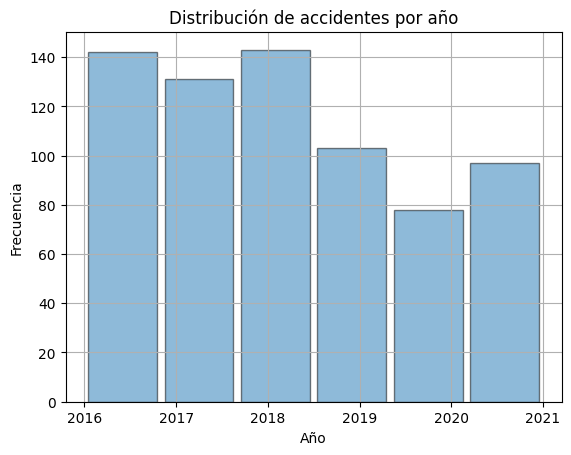

In [16]:
hechos['AAAA'].hist(bins=6, alpha=0.5, edgecolor='black', rwidth=0.9)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de accidentes por año')
plt.show()

En el año 2020 hubo una reducción significativa durante la mayor parte del año, pero de forma abrupta hubo  un incremento notable de accidentes en diciembre del mismo año, en el cual se presentan un total de 20 accidentes, mientras que el mes julio registro el menor número de accidentes en el historico comprendido entre 2016 y 2021.

Es interesante mencionar que el año 2020 represento un record en la disminución de accidentes viales durante pero para el año 2021 se incremento el número de accidentes en un 24.36%, lo cual podria deberse a una relajación de las medidas tomadas en años anteriores, serie conveniente realizar un analisis mas profundo al respecto.

In [17]:
año20 = hechos[hechos['AAAA']==2020]['AAAA'].count()
año21 = hechos[hechos['AAAA']==2021]['AAAA'].count()
print(f'El porcentaje de incremento de accidentes del año 2021 con respecto al 2020 es de {round((año21-año20)*100/año20,2)}%')

El porcentaje de incremento de accidentes del año 2021 con respecto al 2020 es de 24.36%


In [18]:
max20 = hechos.groupby(by=['AAAA','MM'])['MM'].count().sort_values(ascending=False).head(1)
min20 = hechos.groupby(by=['AAAA','MM'])['MM'].count().sort_values(ascending=True).head(1)
print(f'En el mes de diciembre del 2020 incrementaron los accidentes en CABA a un máximo anual de {max20.iloc[0]},\n mientras que para el mes de julio del mismo año se registro el mínimo historico para con un\n total de {min20.iloc[0]} accidentes')

En el mes de diciembre del 2020 incrementaron los accidentes en CABA a un máximo anual de 20,
 mientras que para el mes de julio del mismo año se registro el mínimo historico para con un
 total de 2 accidentes


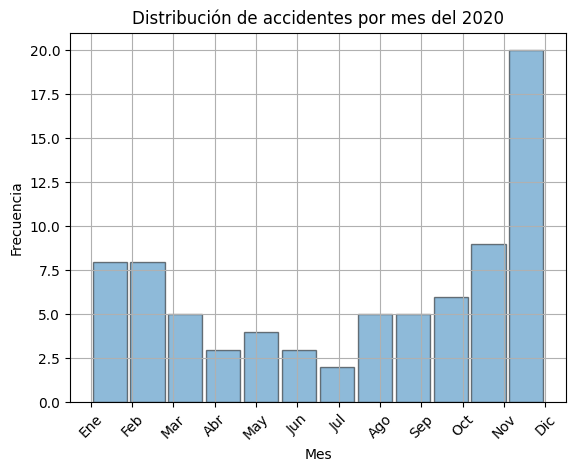

In [19]:
año = 2020
custom_xticks = [1,2,3,4,5,6,7,8,9,10,11,12]
custom_xtick_labels = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
hechos[hechos['AAAA'] == año]['MM'].hist(bins=12, alpha=0.5, edgecolor='black', rwidth=0.9)
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title(f'Distribución de accidentes por mes del {año}')
plt.xticks(custom_xticks, custom_xtick_labels,rotation=45)
plt.show()

El gráfico muestra la distribución de accidentes por hora en CABA, destacando un aumento significativo en la frecuencia de accidentes alrededor de las 5 y las 15 horas. Es interesante porque revela momentos específicos del día en los que los accidentes aumentan considerablemente.

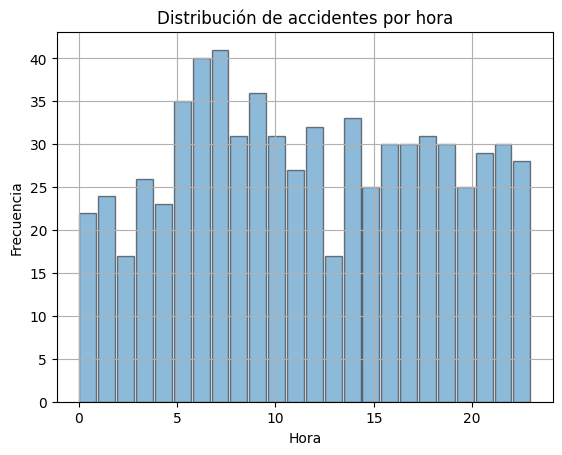

In [20]:
hechos['HH'].hist(bins=24, alpha=0.5, edgecolor='black', rwidth=0.9)
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Distribución de accidentes por hora')
plt.show()

La evolución del número de víctimas por medio de transporte desde el año 2016 hasta el 2021 muestra que el segmento de la población más afectada son en primera instancia los `peatones` y `motociclistas` registrandose número de incidentes similares, mientras que en segunda instancia los `automovilistas` representan un buena proporción de los accidentes viales. El gráfico muestra la evolución de acccidentes a travez del tiempo.

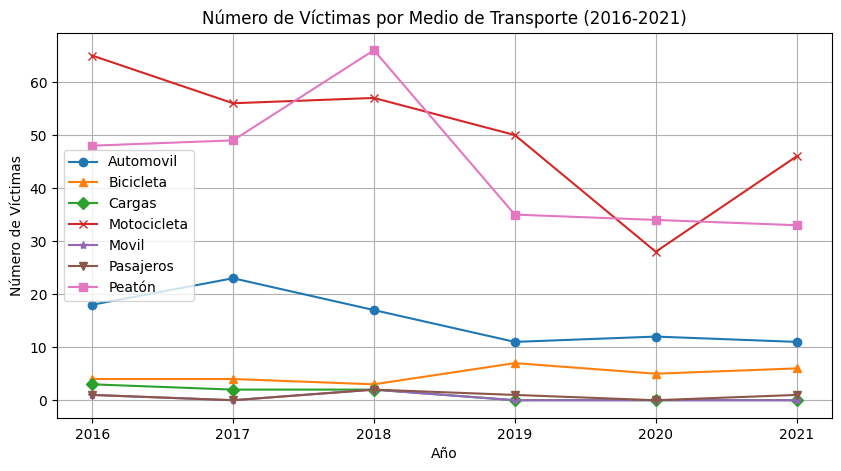

In [21]:
# Función extracción de datos por categorias de transporte
def series_to_list(serie,key:str,años:list):
    lista = []
    i = años[0]
    while i <= años[len(años)-1]:       # Crea una lista con los valores de la serie para cada año
        try:
            lista.append(serie[key,i])
            i += 1
        except KeyError:                # En caso de no disponer del dato de un año en particular
            lista.append(0)             # se imputa 0 para ese año y se agrega en la lista
            i += 1
    return lista

data = hechos.groupby(by=['VICTIMA','AAAA'])['N_VICTIMAS'].sum()
years = list(data['AUTO'].keys())

victims_auto = series_to_list(data,'AUTO',years)
victims_bicicleta = series_to_list(data,'BICICLETA',years)
victims_cargas = series_to_list(data,'CARGAS',years)
victims_moto = series_to_list(data,'MOTO',years)
victims_movil = series_to_list(data,'MOVIL',years)
victims_pasajeros = series_to_list(data,'PASAJEROS',years)
victims_peaton = series_to_list(data,'PEATON',years)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 5))

# Dibujar las líneas para cada medio de transporte
plt.plot(years, victims_auto, marker='o', label='Automovil')
plt.plot(years, victims_bicicleta, marker='^', label='Bicicleta')
plt.plot(years, victims_cargas, marker='D', label='Cargas')
plt.plot(years, victims_moto, marker='x', label='Motocicleta')
plt.plot(years, victims_movil, marker='*', label='Movil')
plt.plot(years, victims_pasajeros, marker='v', label='Pasajeros')
plt.plot(years, victims_peaton, marker='s', label='Peatón')

# Personalizar el gráfico
plt.title('Número de Víctimas por Medio de Transporte (2016-2021)')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.xticks(years)  # Asegurar que todos los años se muestren en el eje x
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Mostrar el gráfico
plt.show()


El analisis de la variable `TIPO_CALLE` nos muestra que existe un vialidad de gran importancia en CABA, la `AV GRAL PAZ`. Esta autopista de 24,3 km de extensión tiene en sus registros algunas particularidades dignas de mención:

In [22]:
hechos['TIPO_DE_CALLE'].value_counts()

TIPO_DE_CALLE
AVENIDA      429
CALLE        135
GRAL PAZ      65
AUTOPISTA     65
Name: count, dtype: int64

La Autopista ``GRAL PAZ`` muestra una distribución de accidentes no uniforme (consulte el mapa), en el tramo entre la intersección con ``Ricardo Gutiérrez`` y la intersección con ``Av. Juan Bautista Justo``, no se registra ningún accidente, lo cual es anormal en un periodo de 6 años de registros, mientras que en el resto de la vialidad, los accidentes están distribuidos de manera más uniforme. Para comprender mejor la ausencia de accidentes en esa sección específica, se requiere un análisis más profundo de los factores que podrían estar influyendo.

In [23]:
map(hechos[(hechos['TIPO_DE_CALLE']=='GRAL PAZ') + (hechos['LUGAR_DEL_HECHO'].str.contains('GRAL PAZ'))])

El mayor numero de victimas para la vialidad `GRAL PAZ` son en primera instancia motociclistas  con 36 defunciones, seguido por automovilistas con 15 y 11 peatones afectados.

In [24]:
hechos[(hechos['TIPO_DE_CALLE']=='GRAL PAZ') + (hechos['LUGAR_DEL_HECHO'].str.contains('GRAL PAZ'))]['VICTIMA'].value_counts()

VICTIMA
MOTO           36
AUTO           15
PEATON         11
CARGAS          2
SD              1
OBJETO FIJO     1
Name: count, dtype: int64

La evolución de victimas de accidentes viales en la autopista `Gral. Paz.` muestran un mayor número de victimas del segmento `motociclistas` mostrando una buena evolución. Por otro lado notamos que no hay registros de accidentes para el año 2021 para esta vialidad por lo que podemos deducir que durante ese año  las seguridad vial fue excelente en esta importante arteria de CABA.

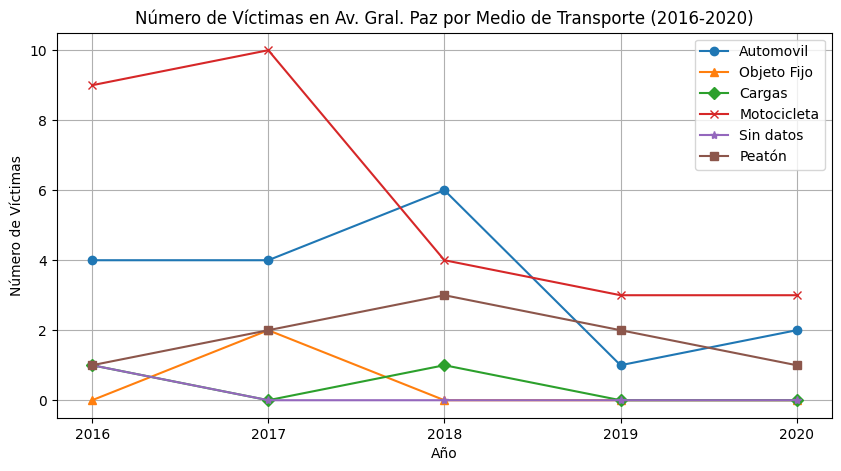

In [25]:
data = hechos[(hechos['TIPO_DE_CALLE']=='GRAL PAZ') + (hechos['LUGAR_DEL_HECHO'].str.contains('GRAL PAZ'))].groupby(by=['VICTIMA','AAAA'])['N_VICTIMAS'].sum()
years = list(data['AUTO'].keys())

victims_auto = series_to_list(data,'AUTO',years)
victims_cargas = series_to_list(data,'CARGAS',years)
victims_moto = series_to_list(data,'MOTO',years)
victims_Ofijo = series_to_list(data,'OBJETO FIJO',years)
victims_sd = series_to_list(data,'SD',years)
victims_peaton = series_to_list(data,'PEATON',years)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 5))

# Dibujar las líneas para cada medio de transporte
plt.plot(years, victims_auto, marker='o', label='Automovil')
plt.plot(years, victims_Ofijo, marker='^', label='Objeto Fijo')
plt.plot(years, victims_cargas, marker='D', label='Cargas')
plt.plot(years, victims_moto, marker='x', label='Motocicleta')
plt.plot(years, victims_sd, marker='*', label='Sin datos')
plt.plot(years, victims_peaton, marker='s', label='Peatón')

# Personalizar el gráfico
plt.title('Número de Víctimas en Av. Gral. Paz por Medio de Transporte (2016-2020)')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.xticks(years)  # Asegurar que todos los años se muestren en el eje x
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Mostrar el gráfico
plt.show()

In [26]:
hechos[(hechos['TIPO_DE_CALLE']=='GRAL PAZ') + (hechos['LUGAR_DEL_HECHO'].str.contains('GRAL PAZ'))]['AAAA'].value_counts()

AAAA
2016    16
2017    16
2018    12
2021    10
2019     6
2020     6
Name: count, dtype: int64

Los participantes de los accidentes en su mayoria esta involucrados ``peatones`` con vehiculos de ``pasajeros`` lo que podira indicar que es necesario mejorar la infraestructura del transporte público de la ciudad (señalizaciones, carriles confinados, paradas, rampas de acceso, etc), ademas es posible que sea necesario implementar campañas que involucren a la sociedad.

Otra área de oportunidad son los `peatones` en donde es posible que sea necesario señalizar los cruces peatonales entre otras señalizaciones que optimicen el flujo vehicular y disminuyan los accidentes.

Los accidentes entre `automoviles` y `motocicletas` son una realidad en la vida cotidiana de CABA, por lo que tal vez sea necesario crear una campaña educativa en la que se fomente el respeto de la leyes de transito.

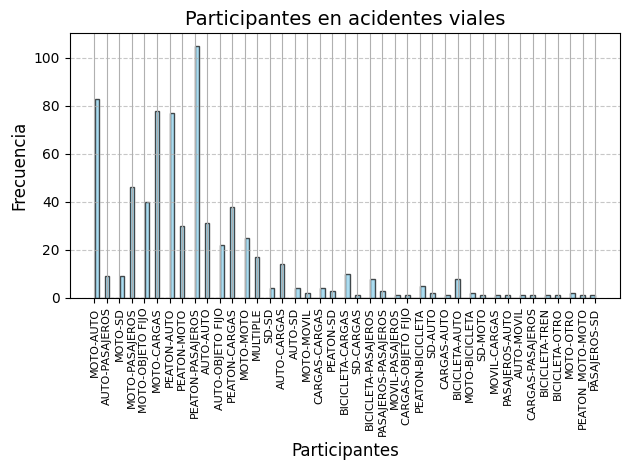

In [27]:
data = hechos['PARTICIPANTES']
data.iloc[:].hist(bins=100, alpha=0.7, edgecolor='black', rwidth=0.9, color='skyblue')
plt.xlabel('Participantes',fontsize=12)
plt.ylabel('Frecuencia',fontsize=12)
plt.title('Participantes en acidentes viales',fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

Visualizando data del DataFrame `victimas`

In [39]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             715 non-null    object        
 1   FECHA                715 non-null    datetime64[ns]
 2   AAAA                 715 non-null    int64         
 3   MM                   715 non-null    int64         
 4   DD                   715 non-null    int64         
 5   ROL                  715 non-null    object        
 6   VICTIMA              715 non-null    object        
 7   SEXO                 715 non-null    object        
 8   EDAD                 715 non-null    object        
 9   FECHA_FALLECIMIENTO  649 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 61.4+ KB


Normalizando datos para la variable `EDAD` como tipo int y `FECHA DE FALLECIMIENTO` a datetime64

In [41]:
victimas['EDAD'] = pd.to_numeric(victimas['EDAD'], errors='coerce')
victimas['EDAD'] = pd.Series(victimas['EDAD'], dtype="Int64")
victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(victimas['FECHA_FALLECIMIENTO'], errors= 'coerce')

El DataFrame `victimas` muestra muestra datos consistentes y no se observan datos atipicos en niguna variable cualitativa.

In [42]:
victimas.describe()

,FECHA,AAAA,MM,DD,EDAD,FECHA_FALLECIMIENTO
count,715,715.000000,715.000000,715.000000,664.0,649
mean,2018-09-10 20:36:35.244755200,2018.180420,6.675524,15.942657,42.167169,2018-11-23 15:27:27.457627136
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,1.0,2016-01-01 00:00:00
25%,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,27.0,2017-07-27 00:00:00
50%,2018-07-10 00:00:00,2018.000000,7.000000,16.000000,37.0,2018-09-21 00:00:00
75%,2019-12-19 12:00:00,2019.000000,10.000000,23.000000,56.25,2020-03-05 00:00:00
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,95.0,2022-01-03 00:00:00
std,NaN,1.671028,3.570954,8.685337,19.788034,NaN


In [43]:
IQR(victimas,'FECHA')
IQR(victimas,'AAAA')
IQR(victimas,'MM')
IQR(victimas,'DD')
IQR(victimas,'EDAD')
IQR(victimas,'FECHA_FALLECIMIENTO')

No se encontraron valores atipicos para la variable FECHA
No se encontraron valores atipicos para la variable AAAA
No se encontraron valores atipicos para la variable MM
No se encontraron valores atipicos para la variable DD
No se encontraron valores atipicos para la variable EDAD
No se encontraron valores atipicos para la variable FECHA_FALLECIMIENTO


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


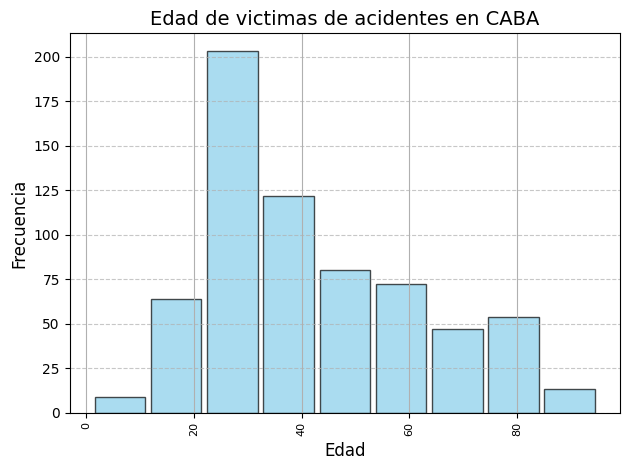

In [44]:
victimas['EDAD'].hist(bins = 9, alpha=0.7, edgecolor='black', rwidth=0.9, color='skyblue')
plt.xlabel('Edad',fontsize=12)
plt.ylabel('Frecuencia',fontsize=12)
plt.title('Edad de victimas de acidentes en CABA',fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

In [ ]:
victimas['SEXO'].hist()

# KPI´s

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Los datos relevantes a la población de CABA se extrae del [indec](https://www.indec.gob.ar/ftp/cuadros/poblacion/proy_1025_depto_caba.xls)

In [75]:
# Creando columna `Semestre` a partir del mes (MM)
hechos['Semestre'] = (hechos['MM'] - 1) // 6 + 1

In [89]:
poblacionCABA = pd.read_excel('../dataset/proy_1025_depto_caba.xls',sheet_name='CABA')


In [93]:
poblacionCABA = poblacionCABA.dropna().reset_index()

In [ ]:
poblacionCABA = poblacionCABA.rename(columns={})

In [122]:
list(poblacionCABA.columns)

['index',
 'Población estimada al 1 de julio de cada año calendario por sexo, según comuna. Ciudad Autónoma de Buenos Aires. Años 2010-2025',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16']

In [120]:
poblacionCABA[poblacionCABA['index'] == 6]

,index,"Población estimada al 1 de julio de cada año calendario por sexo, según comuna. Ciudad Autónoma de Buenos Aires. Años 2010-2025",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
1,6,Total,3028481.0,3033639.0,3038860.0,3044076.0,3049229.0,3054267.0,3059122.0,3063728.0,3068043.0,3072029.0,3075646.0,3078836.0,3081550.0,3083770.0,3085483.0,3086680


In [86]:
hechos[['AAAA','Semestre','VICTIMA']].groupby(by=['AAAA','Semestre']).count()

VICTIMA
AAAA Semestre         
2016 1              64
     2              78
2017 1              64
     2              67
2018 1              67
     2              76
2019 1              56
     2              47
2020 1              31
     2              47
2021 1              55
     2              42

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

In [69]:
a = hechos[hechos['VICTIMA'] == 'MOTO'].groupby(by=['AAAA']).count()
años = list(a.index)
novic = list(a['VICTIMA'])
kpi = [np.nan]
kpi_f = {}
for i in range(len(años)-1):
    a = round(100 * (novic[i]-novic[i+1])/novic[i],2)
    kpi.append(a)
kpi_f['año'] = años
kpi_f['Victimas'] = novic
kpi_f['Reduccion_7%'] = kpi
KPI_accidentes_moto = pd.DataFrame(kpi_f)


In [66]:
KPI_accidentes_moto

,año,Victimas,Reducción 7%
0,2016,64,NaN
1,2017,53,17.19
2,2018,55,-3.77
3,2019,50,9.09
4,2020,27,46.00
5,2021,46,-70.37


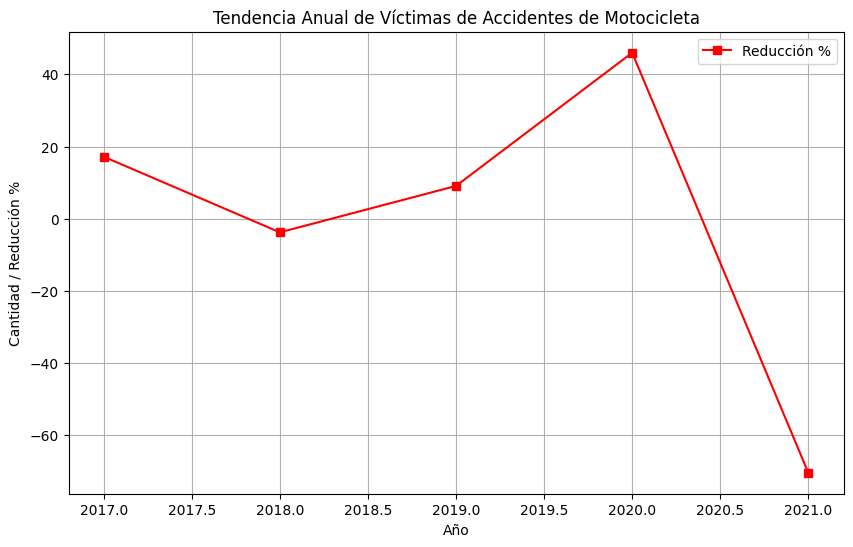

In [71]:
# Crear la gráfica de línea
plt.figure(figsize=(10, 6))
# plt.plot(KPI_accidentes_moto['año'], KPI_accidentes_moto['Victimas'], marker='o', label='Víctimas')
plt.plot(KPI_accidentes_moto['año'], KPI_accidentes_moto['Reduccion_7%'], marker='s', label='Reducción %', color='red')

# Personalizar la gráfica
plt.title('Tendencia Anual de Víctimas de Accidentes de Motocicleta')
plt.xlabel('Año')
plt.ylabel('Reducción %')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()
